<a href="https://colab.research.google.com/github/Bhavana-Kolli/22035573_Final-Project_Stock-Market/blob/main/22035573_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
# Import libraries used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# Stocks were imported from Yahoo Finance using yfinance
import yfinance as yf


# **Functions**

In [ ]:
def plot_stock_data(stock_data, stock_name="Stock"):
    """
    Plots the closing price and volume of a given stock.

    """

    # Set up the figure and two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the closing price on the first subplot
    ax1.plot(stock_data['Close'], label='Closing Price')
    ax1.set_ylabel('Stock Prices')
    ax1.set_xlabel('Year')
    ax1.set_title(f"Closing Price of {stock_name} Stock")
    ax1.legend()

    # Plot the trading volume on the second subplot
    ax2.plot(stock_data['Volume'], label='Volume Traded')
    ax2.set_ylabel('Volume')
    ax2.set_xlabel('Year')
    ax2.set_title(f"Volume Traded for {stock_name} Stock in Past Decade")
    ax2.legend()


    plt.tight_layout()
    plt.show()

# **BAE Systems Plc**

## **Data Loading**

In [ ]:
# Fetching the data of BAE Systems Plc from yahoo finance

# Define the ticker symbol
bae = "BA.L"

# Download the data for the specified date range
bae_data = yf.download(bae, start="2014-10-01", end="2024-10-01")

# Save the data to a CSV file
bae_data.to_csv('BAE_stock_data_10years.csv')

# Show the data
bae_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BA.L,BA.L,BA.L,BA.L,BA.L,BA.L
Date,,,,,,
2014-10-01 00:00:00+00:00,312.949249,463.200012,474.799988,462.100006,470.899994,6807389
2014-10-02 00:00:00+00:00,306.598358,453.799988,460.000000,453.000000,454.000000,9285952
2014-10-03 00:00:00+00:00,310.922302,460.200012,461.290985,453.299988,454.700012,6578201
2014-10-06 00:00:00+00:00,311.868164,461.600006,465.899994,458.500000,458.500000,6585452
2014-10-07 00:00:00+00:00,304.368805,450.500000,459.757996,445.000000,459.700012,11095801
...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,1255.620117,1267.500000,1276.500000,1261.849976,1273.500000,11342845
2024-09-25 00:00:00+00:00,1262.059204,1274.000000,1276.500000,1256.000000,1257.000000,6238942


In [ ]:
# General information of BAE Systems Plc stock
bae_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2526 entries, 2014-10-01 00:00:00+00:00 to 2024-09-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BA.L)  2526 non-null   float64
 1   (Close, BA.L)      2526 non-null   float64
 2   (High, BA.L)       2526 non-null   float64
 3   (Low, BA.L)        2526 non-null   float64
 4   (Open, BA.L)       2526 non-null   float64
 5   (Volume, BA.L)     2526 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.1 KB


In [ ]:
# Summary stats for BAE Systems Plc stock
bae_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BA.L,BA.L,BA.L,BA.L,BA.L,BA.L
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2.526000e+03
mean,568.384830,659.810301,666.216326,653.037293,659.922097,7.983746e+06
std,268.185360,235.550137,237.705318,233.742489,235.675575,4.108558e+06
min,295.382904,397.000000,406.399994,5.694000,398.600006,0.000000e+00
25%,402.103760,505.000000,511.000000,499.491997,505.500000,5.408591e+06
50%,460.407639,569.300018,574.000000,564.333527,568.200012,7.127968e+06
75%,675.781067,731.549988,741.170502,718.350021,731.250015,9.637130e+06
max,1386.878296,1400.000000,1415.250000,1395.500000,1403.500000,5.421986e+07


In [ ]:
# Print the number of rows in the original data
print('Rows in original data = %d' % (bae_data.shape[0]))

# Drop rows with missing values
df = bae_data.dropna()

# Print the number of rows after discarding missing values
print('Rows after discarding missing values = %d' % (df.shape[0]))

Rows in original data = 2526
Rows after discarding missing values = 2526


## **Preprocessing**

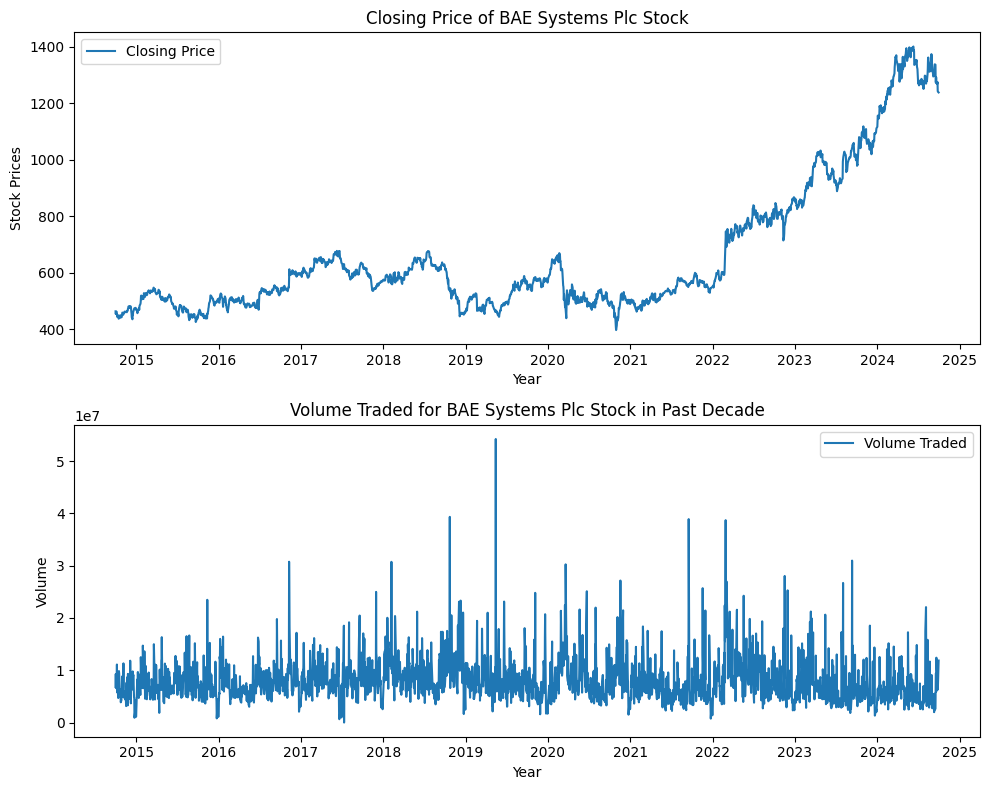

In [ ]:
# Plotting the closing price and volume traded for BAE Systems Plc stock over 10 years.
plot_stock_data(bae_data, stock_name="BAE Systems Plc")


<Axes: title={'center': 'Moving Average for BAE Systems Plc stock'}, xlabel='Date'>

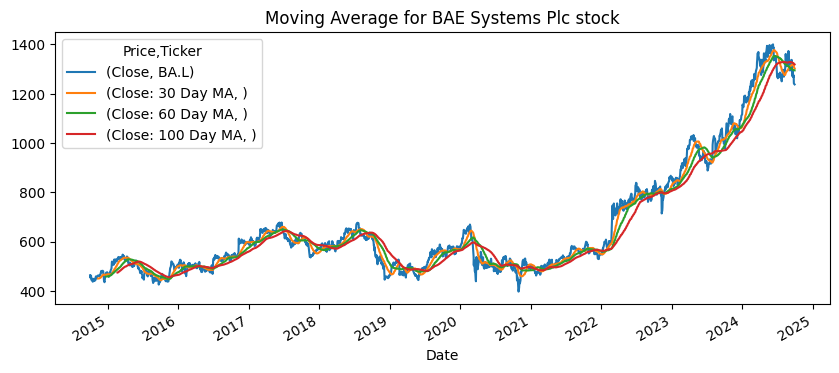

In [ ]:
# Plotting Moving Average for BAE Systems Plc stock

bae_data['Close: 30 Day MA'] = bae_data['Close'].rolling(window=30).mean()
bae_data['Close: 60 Day MA'] = bae_data['Close'].rolling(window=60).mean()
bae_data['Close: 100 Day MA'] = bae_data['Close'].rolling(window=100).mean()
bae_data[['Close','Close: 30 Day MA','Close: 60 Day MA','Close: 100 Day MA']].plot(figsize=(10,4), title='Moving Average for BAE Systems Plc stock')